In [2]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
df = pd.read_csv("AirQualityUCI.csv",sep=';')

In [4]:
def clean_numeric_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.replace(',', '.').astype(float)
            except:
                continue
    return df
df = clean_numeric_columns(df)

In [5]:
import numpy as np

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)
df.replace(-200.0,np.nan,inplace=True)
# Check if the replacement worked
print(df.isnull().sum())

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [6]:
df.head(20)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 15','Unnamed: 16'],axis=1)

In [8]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [9]:
df.isnull().sum()

,0
Date,114
Time,114
CO(GT),1797
PT08.S1(CO),480
NMHC(GT),8557
C6H6(GT),480
PT08.S2(NMHC),480
NOx(GT),1753
PT08.S3(NOx),480
NO2(GT),1756


In [10]:
df.shape

(9471, 15)

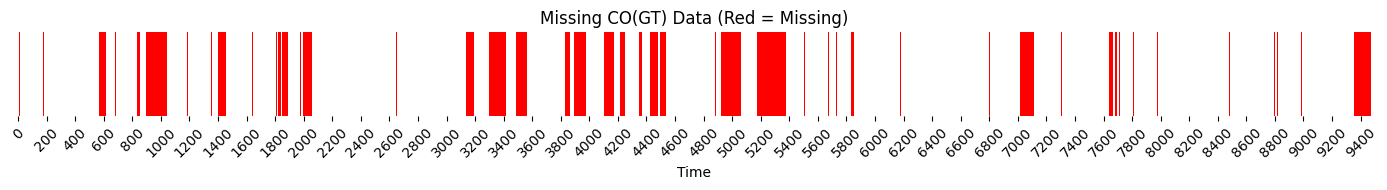

In [11]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['white', 'red'])  # white = valid, red = missing

plt.figure(figsize=(14, 2))
sns.heatmap(df['CO(GT)'].isnull().values.reshape(1, -1),
            cmap=cmap,
            cbar=False,
            xticklabels=200)

plt.xticks(rotation=45)
plt.yticks([])
plt.title('Missing CO(GT) Data (Red = Missing)')
plt.xlabel('Time')
plt.tight_layout()
plt.show()

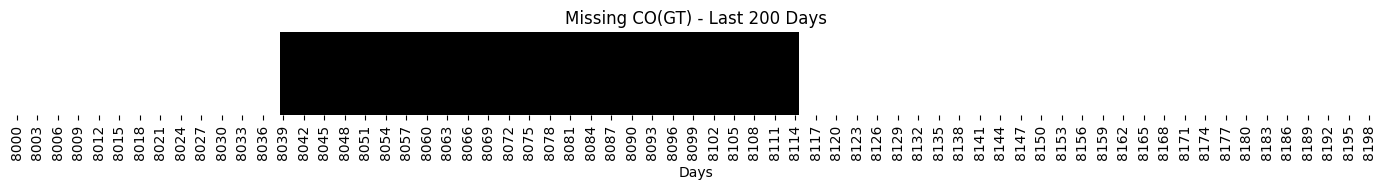

In [12]:
plt.figure(figsize=(14, 2))

# Slice first 200 rows (days)
sns.heatmap(df[['T']].isnull().iloc[8000:8200].T, cmap='Greys', cbar=False)

plt.title('Missing CO(GT) - Last 200 Days')
plt.xlabel('Days')
plt.yticks([])
plt.tight_layout()
plt.show()

In [13]:
df = df.iloc[:9357].reset_index(drop=True)

In [14]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


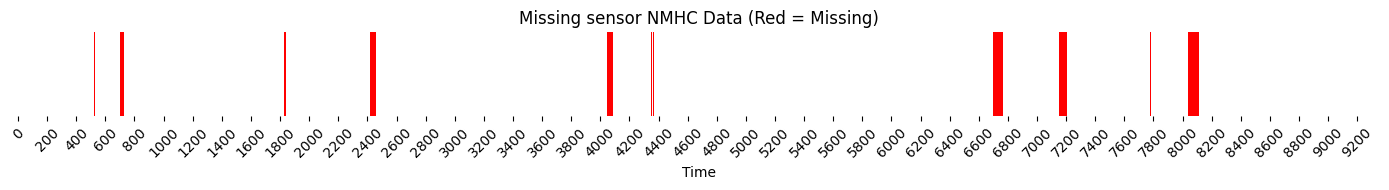

In [15]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['white', 'red'])  # white = valid, red = missing

plt.figure(figsize=(14, 2))
sns.heatmap(df['PT08.S3(NOx)'].isnull().values.reshape(1, -1),
            cmap=cmap,
            cbar=False,
            xticklabels=200)

plt.xticks(rotation=45)
plt.yticks([])
plt.title('Missing sensor NMHC Data (Red = Missing)')
plt.xlabel('Time')
plt.tight_layout()
plt.show()

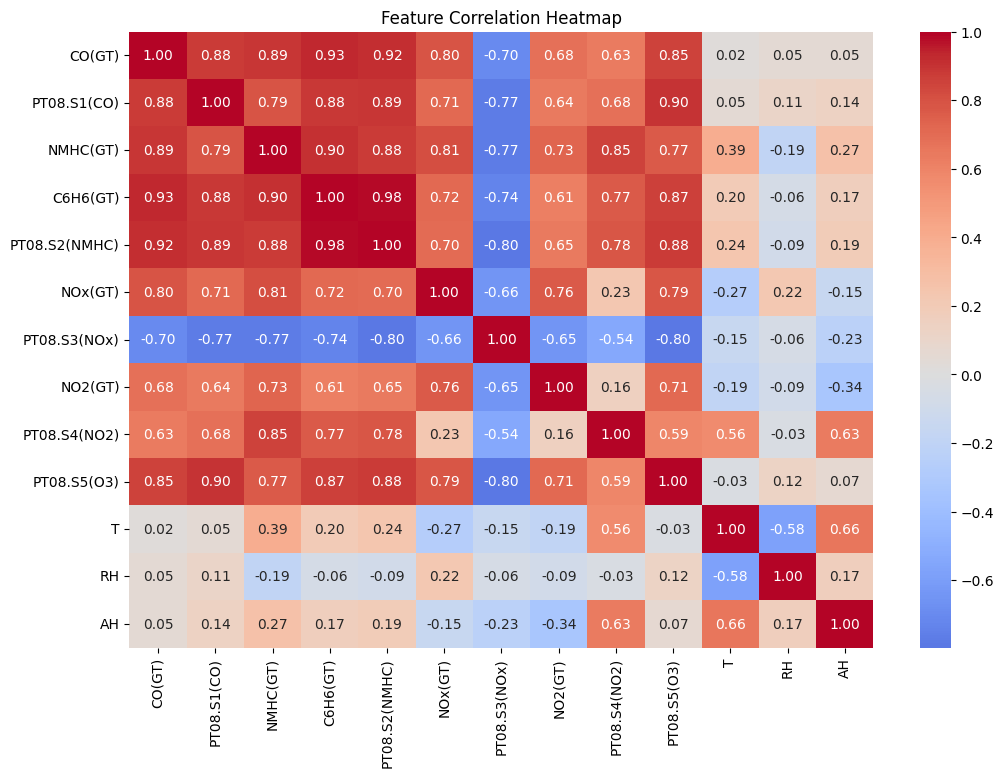

In [16]:
correlation_matrix = df.drop(['Date','Time'],axis=1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Specify the target feature ('NO2(GT)') and the correlated features
target = 'CO(GT)'
correlated_features = ['C6H6(GT)', 'NMHC(GT)','PT08.S2(NMHC)','PT08.S1(CO)']

# Split the data into rows with missing values and those without missing values
train_data = df.dropna(subset=[target])  # Rows without missing target
test_data = df[df[target].isna()]  # Rows with missing target

# Features for training model (correlated features)
X_train = train_data[correlated_features]
y_train = train_data[target]

# Train a Random Forest model to predict missing values of NO2(GT)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Impute missing values for 'NO2(GT)' using the trained model
X_test = test_data[correlated_features]
predicted_values = model.predict(X_test)

# Update the missing values in the original DataFrame
df.loc[df[target].isna(), target] = predicted_values


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Specify the target feature ('NO2(GT)') and the correlated features
target = 'NO2(GT)'
correlated_features = ['NOx(GT)', 'NMHC(GT)','PT08.S5(O3)']

# Split the data into rows with missing values and those without missing values
train_data = df.dropna(subset=[target])  # Rows without missing target
test_data = df[df[target].isna()]  # Rows with missing target

# Features for training model (correlated features)
X_train = train_data[correlated_features]
y_train = train_data[target]

# Train a Random Forest model to predict missing values of NO2(GT)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Impute missing values for 'NO2(GT)' using the trained model
X_test = test_data[correlated_features]
predicted_values = model.predict(X_test)

# Update the missing values in the original DataFrame
df.loc[df[target].isna(), target] = predicted_values


In [19]:
df = df.drop(['PT08.S1(CO)','NMHC(GT)','NOx(GT)','PT08.S4(NO2)'],axis=1)

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
columns_to_impute = ['PT08.S2(NMHC)', 'C6H6(GT)','CO(GT)','PT08.S5(O3)'] # Define columns for imputation
df_imputed = imputer.fit_transform(df[columns_to_impute])

# Convert the imputed data back to DataFrame, using the correct columns
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute, index=df.index) # Use the same index

# Update original DataFrame with imputed values
df[columns_to_impute] = df_imputed[columns_to_impute]

In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
columns_to_impute = ['PT08.S3(NOx)','PT08.S2(NMHC)','PT08.S5(O3)'] # Define columns for imputation
df_imputed = imputer.fit_transform(df[columns_to_impute])

# Convert the imputed data back to DataFrame, using the correct columns
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute, index=df.index) # Use the same index

# Update original DataFrame with imputed values
df[columns_to_impute] = df_imputed[columns_to_impute]

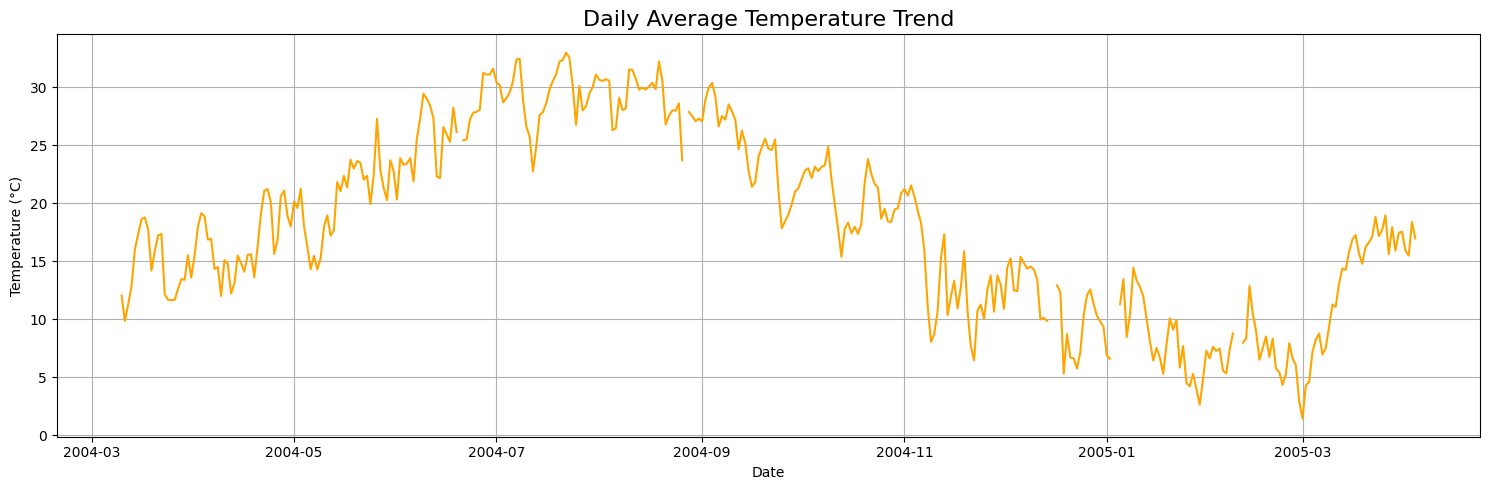

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' has a datetime index and a column named 'T' for Temperature

# Convert 'Date' and 'Time' to datetime index if not already done
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df.set_index('datetime', inplace=True)

# Resample to daily average temperature
daily_temp = df['T'].resample('D').mean()

# Plot
plt.figure(figsize=(15, 5))
plt.plot(daily_temp, color='orange', linewidth=1.5)
plt.title("Daily Average Temperature Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Ensure datetime index
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df.set_index('datetime', inplace=True)

# Extract time-based features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek  # 0 = Monday

# Apply group-wise seasonal imputation
def impute_by_hour_dayofweek(df, col):
    df[col] = df.groupby(['dayofweek', 'hour'])[col].transform(lambda x: x.fillna(x.mean()))
    return df

# Apply for multiple features
for col in ['T', 'RH', 'AH']:
    df = impute_by_hour_dayofweek(df, col)

In [24]:
df = df.drop(['hour','dayofweek'],axis=1)

In [25]:
# Combine 'Date' and 'Time' columns into a single string and convert it to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

# Set the DateTime column as the index
df.set_index('DateTime', inplace=True)

# Sort the DataFrame by DateTime (if it's not sorted already)
df.sort_index(inplace=True)
df = df.drop(['Date','Time'],axis=1)
df.head()

,CO(GT),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,
2004-03-10 18:00:00,2.6,11.9,1046.0,1056.0,113.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,9.4,955.0,1174.0,92.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,9.0,939.0,1140.0,114.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,9.2,948.0,1092.0,122.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,6.5,836.0,1205.0,116.0,1110.0,11.2,59.6,0.7888


#Converting CO(GT) to ppm
###1 mg/m³ CO=0.873 ppm at 25°C, 1 atm

In [26]:
df['CO_ppm'] = df['CO(GT)'] * 0.873

In [27]:
def compute_aqi(value, breakpoints):
    for c_low, c_high, i_low, i_high in breakpoints:
        if c_low <= value <= c_high:
            return round(((i_high - i_low) / (c_high - c_low)) * (value - c_low) + i_low)
    return None

# Breakpoints for CO (ppm)
co_breakpoints = [
    (0.0, 4.4, 0, 50),
    (4.5, 9.4, 51, 100),
    (9.5, 12.4, 101, 150),
    (12.5, 15.4, 151, 200),
    (15.5, 30.4, 201, 300),
    (30.5, 50.4, 301, 500)
]

# Breakpoints for NO2 (µg/m³)
no2_breakpoints = [
    (0, 40, 0, 50),
    (41, 80, 51, 100),
    (81, 180, 101, 200),
    (181, 280, 201, 300),
    (281, 400, 301, 400),
    (401, 1000, 401, 500)
]

# Apply to DataFrame
df['CO_ppm'] = df['CO(GT)'] * 0.873
df['AQI_CO'] = df['CO_ppm'].apply(lambda x: compute_aqi(x, co_breakpoints))
df['AQI_NO2'] = df['NO2(GT)'].apply(lambda x: compute_aqi(x, no2_breakpoints))

# Final AQI = max of individual AQIs
df['AQI_Overall'] = df[['AQI_CO', 'AQI_NO2']].max(axis=1)

In [28]:
df = df.drop(['CO_ppm','AQI_CO','AQI_NO2'],axis=1)
df.head()

,CO(GT),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH,AQI_Overall
DateTime,,,,,,,,,,
2004-03-10 18:00:00,2.6,11.9,1046.0,1056.0,113.0,1268.0,13.6,48.9,0.7578,133.0
2004-03-10 19:00:00,2.0,9.4,955.0,1174.0,92.0,972.0,13.3,47.7,0.7255,112.0
2004-03-10 20:00:00,2.2,9.0,939.0,1140.0,114.0,1074.0,11.9,54.0,0.7502,134.0
2004-03-10 21:00:00,2.2,9.2,948.0,1092.0,122.0,1203.0,11.0,60.0,0.7867,142.0
2004-03-10 22:00:00,1.6,6.5,836.0,1205.0,116.0,1110.0,11.2,59.6,0.7888,136.0


In [29]:
df.describe()

,CO(GT),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH,AQI_Overall
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.108001,10.175582,942.693577,832.721364,112.418888,1029.432233,18.328138,49.241966,1.026196,131.160842
std,1.438410,7.477029,266.833294,254.597804,44.124101,398.022937,8.682765,17.067352,0.395922,46.002088
min,0.100000,0.100000,383.000000,322.000000,2.000000,221.000000,-1.900000,9.200000,0.184700,4.000000
25%,1.008000,4.500000,739.000000,657.000000,85.000000,740.000000,12.000000,36.436538,0.746100,105.000000
50%,1.793000,8.400000,914.000000,803.000000,108.000000,968.000000,17.800000,49.600000,1.009000,128.000000
75%,2.800000,14.100000,1118.000000,966.000000,133.000000,1278.000000,24.100000,62.000000,1.296200,153.000000
max,11.900000,63.700000,2214.000000,2683.000000,340.000000,2523.000000,44.600000,88.700000,2.231000,350.000000


In [30]:
print(df.duplicated().sum())

10


In [31]:
df.dtypes

,0
CO(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S5(O3),float64
T,float64
RH,float64
AH,float64
AQI_Overall,float64


In [32]:
# Check if data is hourly
print(df.index.diff().value_counts())  # Should return Timedelta of 1 hour

DateTime
0 days 01:00:00    9356
Name: count, dtype: int64


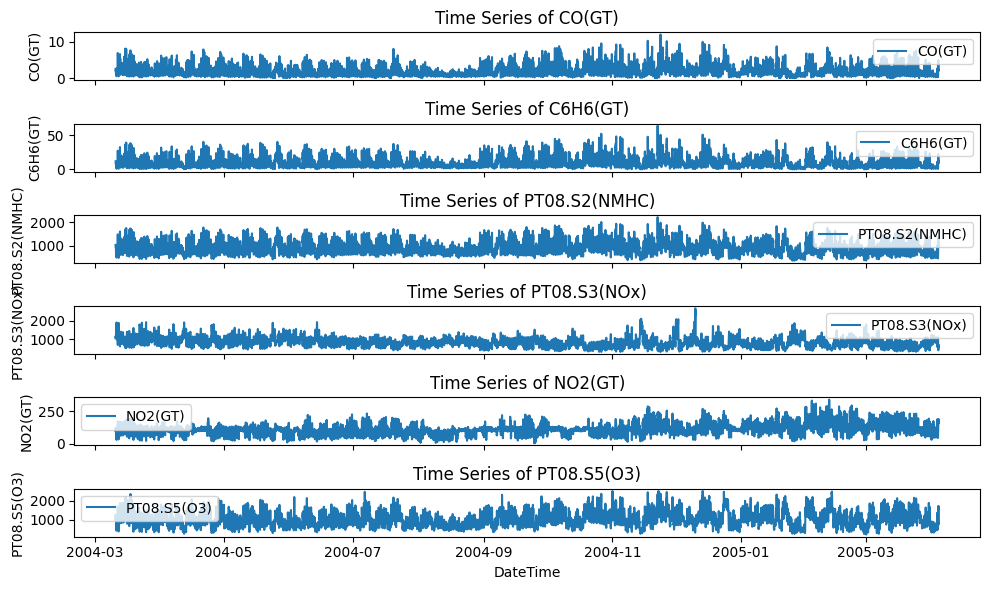

In [33]:
# List of pollutants to plot
pollutants = ['CO(GT)', 	'C6H6(GT)', 	'PT08.S2(NMHC)', 	'PT08.S3(NOx)', 	'NO2(GT)', 	'PT08.S5(O3)']

# Create subplots
fig, axs = plt.subplots(len(pollutants), 1, figsize=(10, 6), sharex=True)

# Plot each pollutant on a separate subplot
for i, pollutant in enumerate(pollutants):
    axs[i].plot(df.index, df[pollutant], label=pollutant)
    axs[i].set_title(f'Time Series of {pollutant}')
    axs[i].set_ylabel(pollutant)
    axs[i].legend()

# Set common labels
plt.xlabel('DateTime')
plt.tight_layout()

# Show the plot
plt.show()

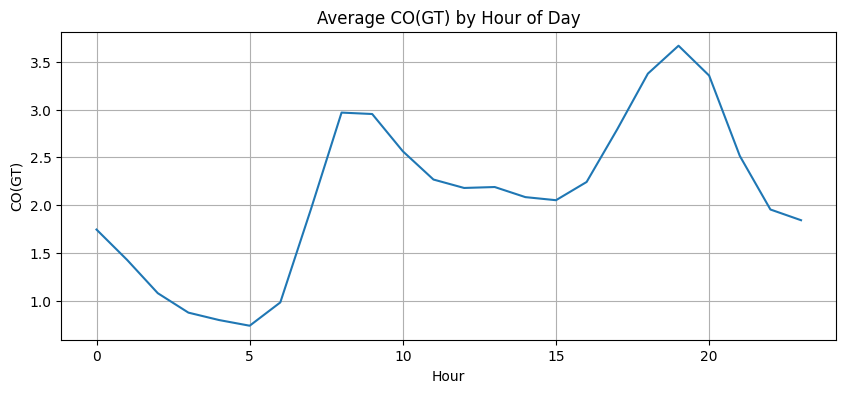

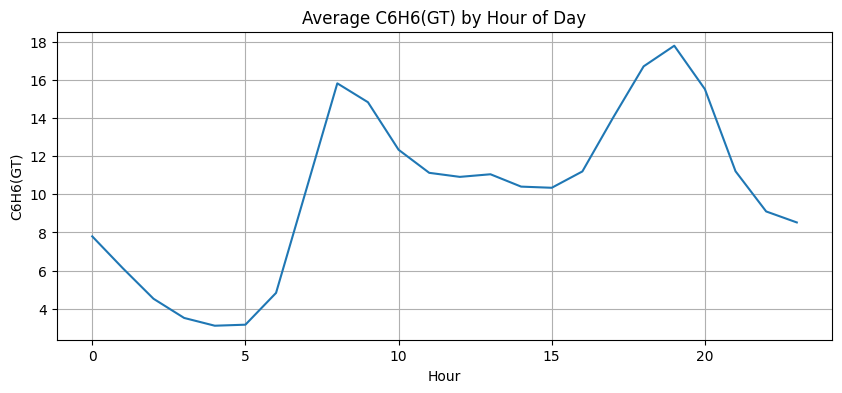

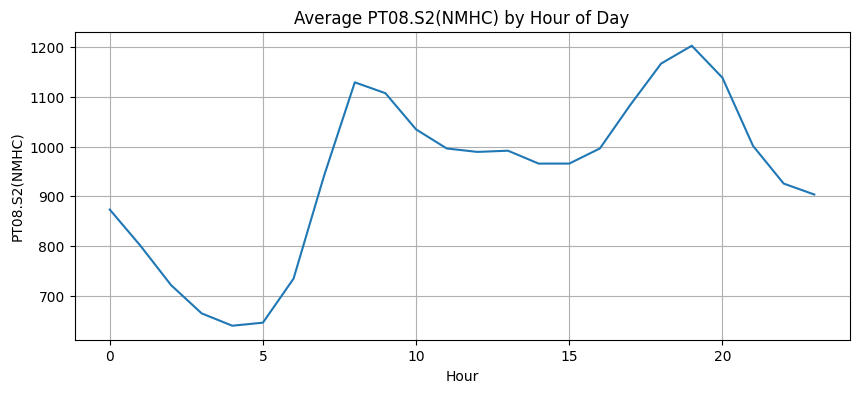

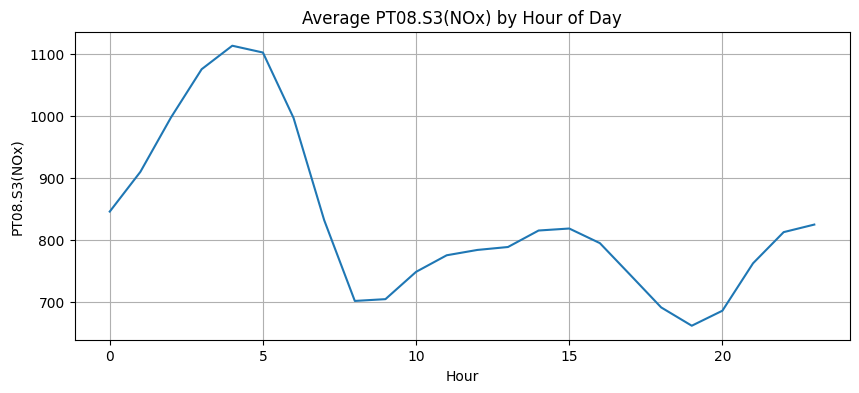

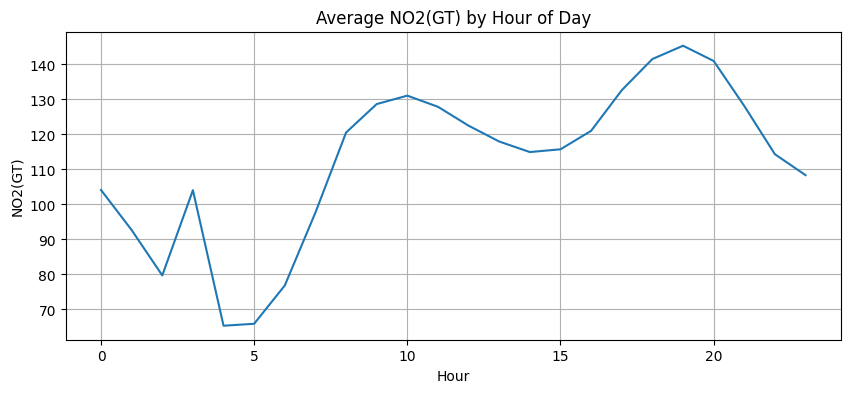

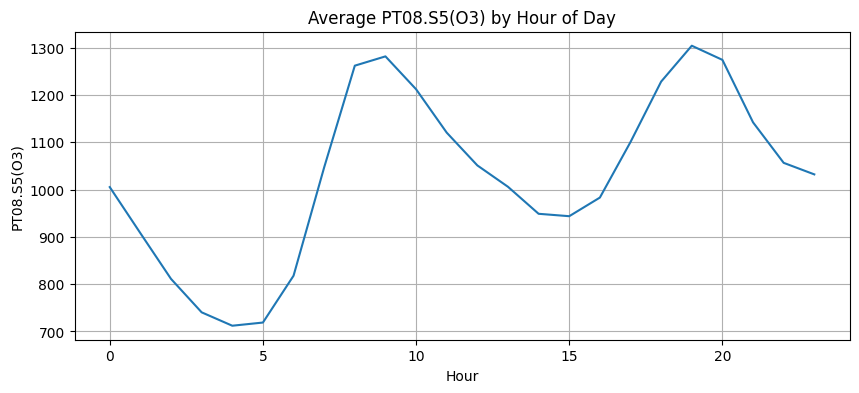

In [34]:
for pollutant in pollutants:
    plt.figure(figsize=(10, 4))
    df.groupby(df.index.hour)[pollutant].mean().plot()
    plt.title(f"Average {pollutant} by Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel(pollutant)
    plt.grid(True)
    plt.show()

There is a similarity in average hourly trends of all pollutants except NOx which has the opposite trend

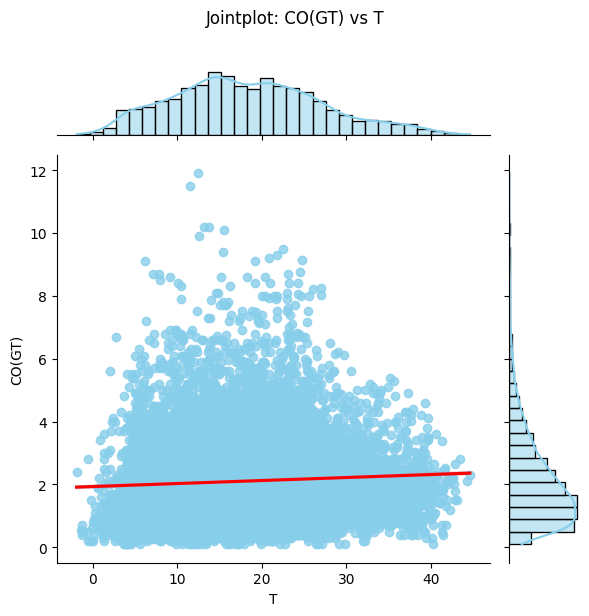

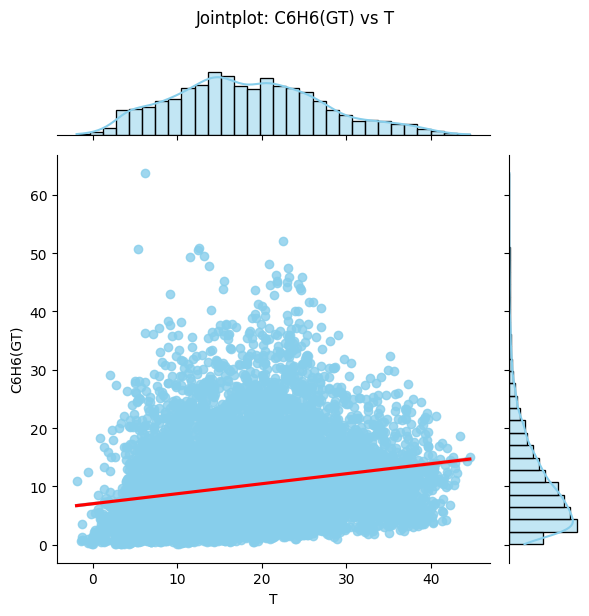

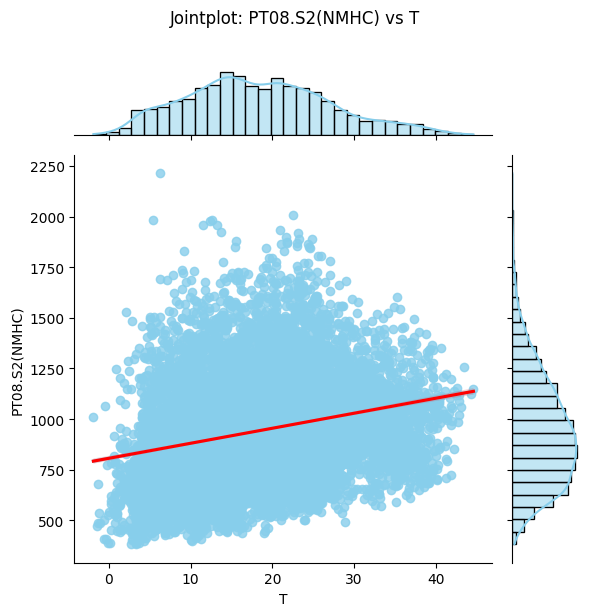

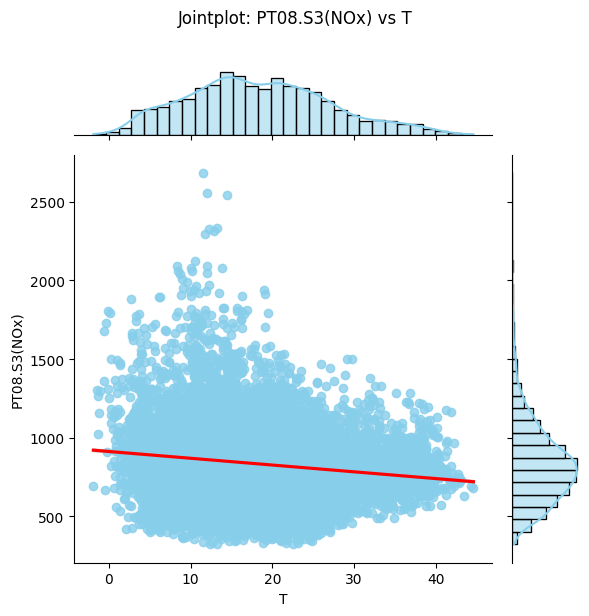

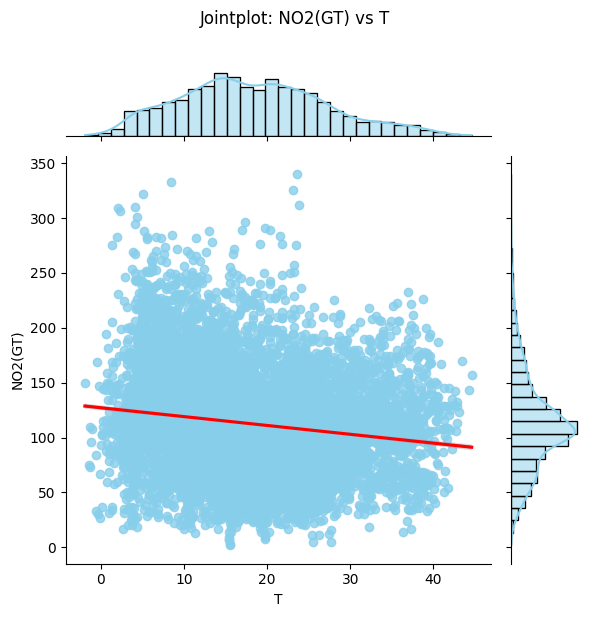

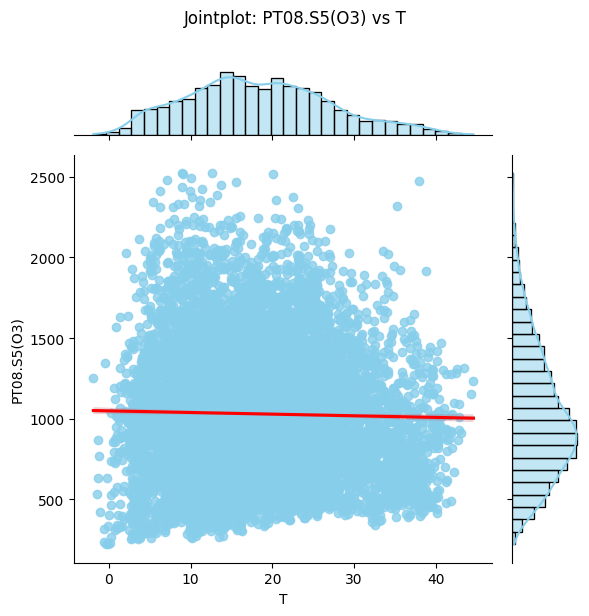

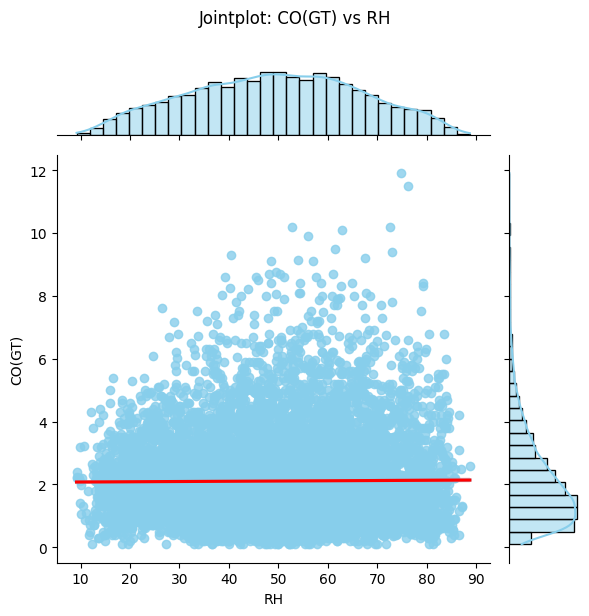

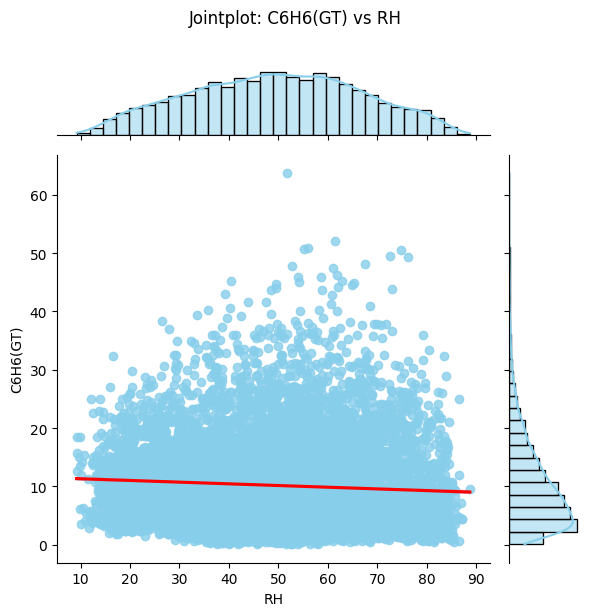

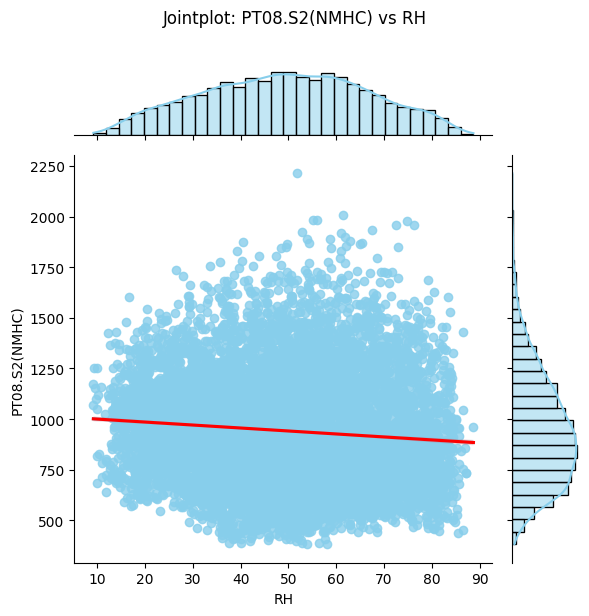

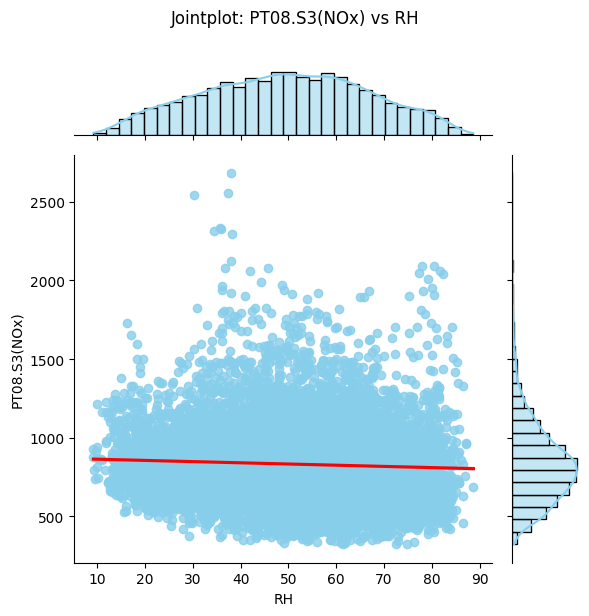

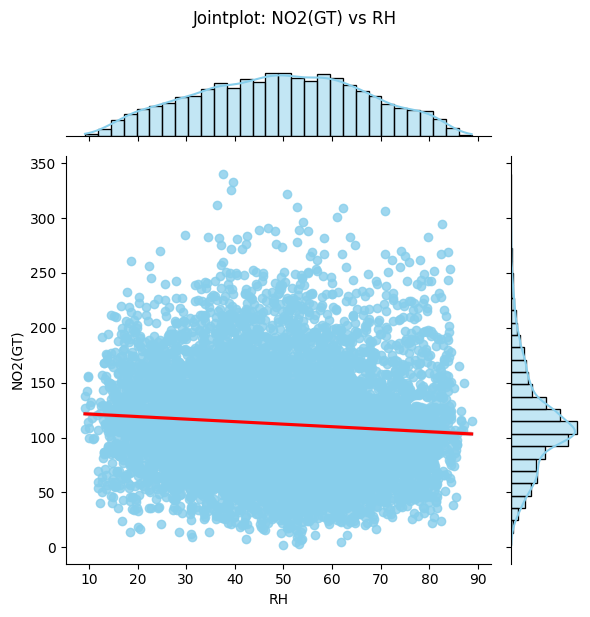

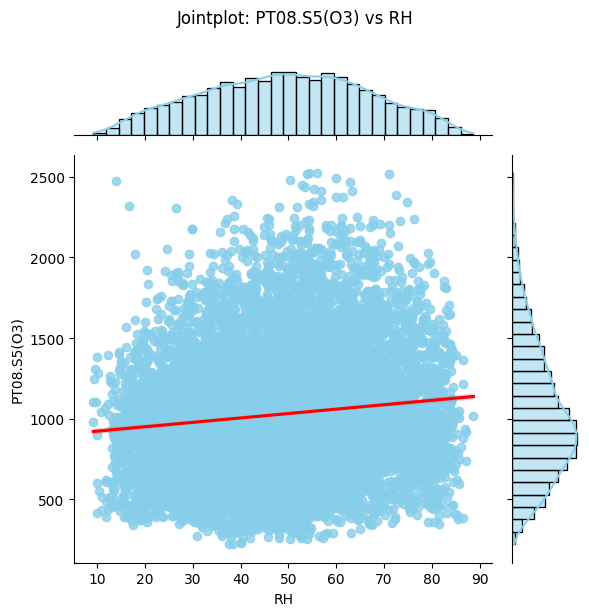

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define your pollutants and features
features = ['T', 'RH']

# Replace -200 (missing values) with NaN, drop rows with missing
df_clean = df[pollutants + features].replace(-200, pd.NA).dropna()

# Plot jointplots
for feature in features:
    for pollutant in pollutants:
        sns.jointplot(
            data=df_clean,
            x=feature,
            y=pollutant,
            kind='reg',  # You can also use 'scatter', 'hex', etc.
            height=6,
            color='skyblue',
            marginal_kws={'bins': 30, 'fill': True}
        ).plot_joint(sns.regplot, scatter=False, color='red')
        plt.suptitle(f'Jointplot: {pollutant} vs {feature}', y=1.02)
        plt.tight_layout()
        plt.show()

**Pollutants that don't vary much with temperature** - CO(GT) O3(GT) <br>
**Pollutants that show increasing trend with temperature** - C6H6(GT), NMHC sensor <br>
**Pollutants that show decreasing trend with temperature** - NOx sensor, NO2(GT)

**Pollutants that don't vary much with RH** - CO(GT), C6H6(GT), <br> NMHC sensor, NOx sensor, NO2(GT) <br>
**Increasing trend with RH** - O3 sensor

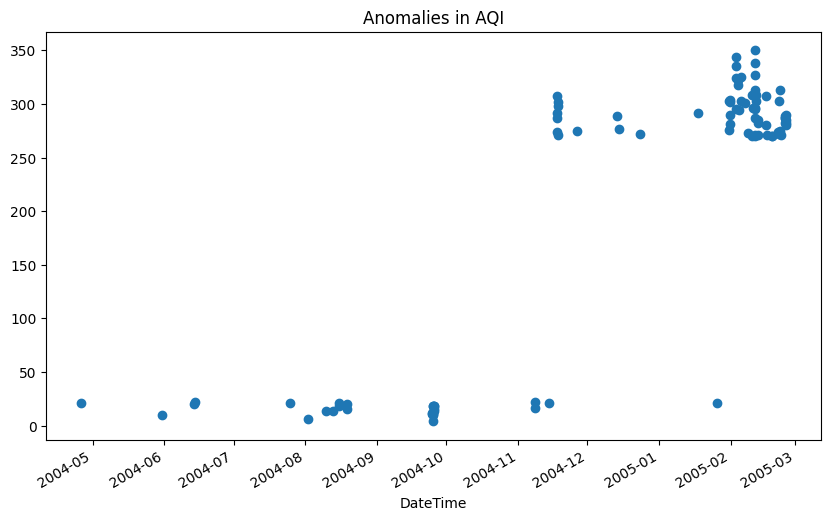

In [36]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df[['AQI_Overall']])

# Visualize anomalies
df[df['anomaly'] == -1]['AQI_Overall'].plot(style='o', title="Anomalies in AQI", figsize=(10, 6))
plt.show()

A cluster of anomalies can be seen in February of 2005, which means AQI calculation in this time period is questionable

In [37]:
df = df.drop(['anomaly'],axis=1)

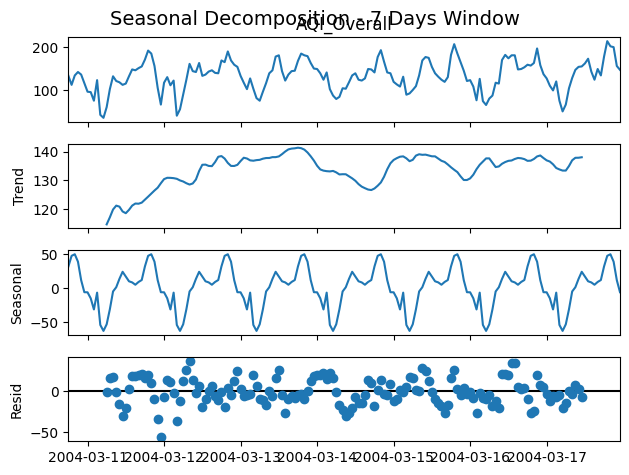

In [38]:
# Example: Slice 7 days worth of data
subset = df['AQI_Overall'].loc['2004-03-10':'2004-03-17'].dropna()

# Make sure you have at least 2 × period data points
# For hourly data and period=24, you need ≥ 48 points

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(subset, model='additive', period=24)
result.plot()
plt.suptitle("Seasonal Decomposition - 7 Days Window", fontsize=14)
plt.show()

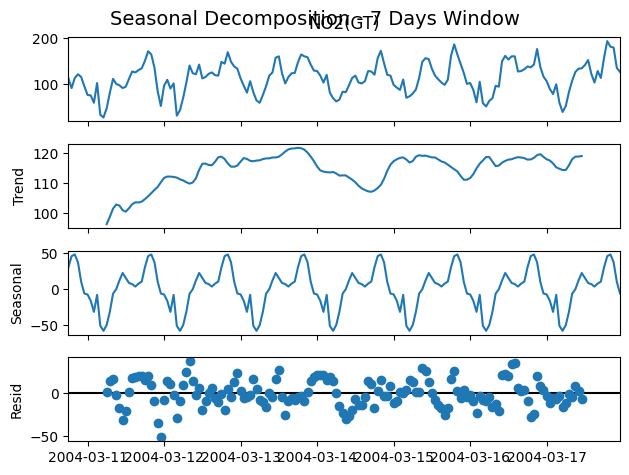

In [39]:
# Example: Slice 7 days worth of data
subset = df['NO2(GT)'].loc['2004-03-10':'2004-03-17'].dropna()

# Make sure you have at least 2 × period data points
# For hourly data and period=24, you need ≥ 48 points

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(subset, model='additive', period=24)
result.plot()
plt.suptitle("Seasonal Decomposition - 7 Days Window", fontsize=14)
plt.show()

Clearly AQI and the major pollutant for aqi measurement shows seasonality, so we shall start by SARIMA

In [40]:
# Calculate daily AQI after hourly AQI
daily_aqi = df.resample('D').mean().dropna()

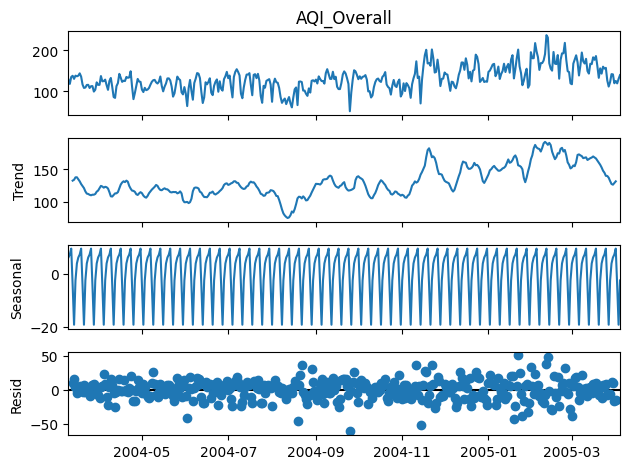

In [41]:
# Perform seasonal decomposition
result = seasonal_decompose(daily_aqi['AQI_Overall'], model='additive', period=7)  # Weekly seasonality

# Plot the decomposition
result.plot()
plt.show()

#Significant seasonality in overall AQI, so we can try SARIMA

In [42]:
daily_aqi = daily_aqi.asfreq('D')  # 'D' = daily frequency


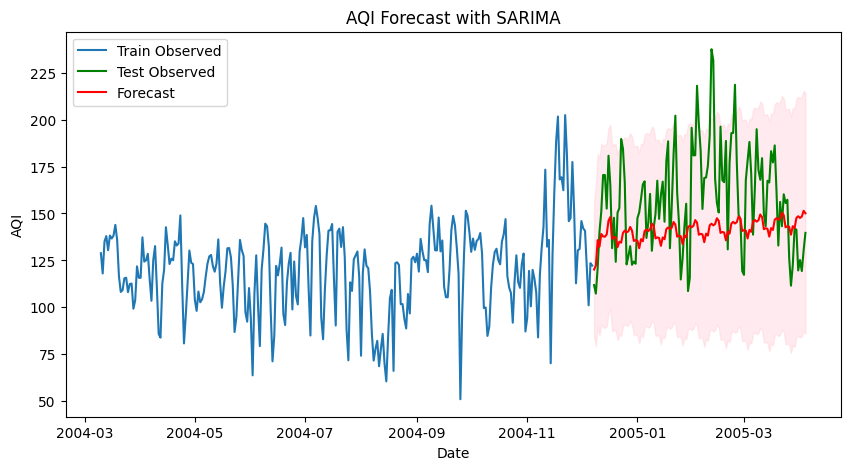

RMSE: 30.818135885593954


In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split the data (let's reserve the last 30% for testing)
train_size = int(len(daily_aqi) * 0.7)
train, test = daily_aqi[:train_size], daily_aqi[train_size:]

# Make sure the indices are correctly set to DatetimeIndex
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# Fit the SARIMA model on the training set
model = SARIMAX(train['AQI_Overall'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
results = model.fit()

# Forecasting the next steps (same length as the test set)
forecast = results.get_forecast(steps=len(test))
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Align the predicted values with the test set using the index
predicted_mean = predicted_mean.reindex(test.index)

# Drop rows with NaN values from both test and predicted_mean
test_no_nan = test['AQI_Overall'].dropna()
predicted_mean_no_nan = predicted_mean[test_no_nan.index]  # Align using the index of test_no_nan


# Plot the observed vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['AQI_Overall'], label='Train Observed')
plt.plot(test.index, test['AQI_Overall'], label='Test Observed', color='green')
plt.plot(predicted_mean.index, predicted_mean, label='Forecast', color='red')

# Adding confidence intervals
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Forecast with SARIMA')
plt.legend()
plt.show()

# Calculate RMSE or any other metric for validation
from sklearn.metrics import mean_squared_error

# Use the NaN-dropped Series for RMSE calculation
rmse = mean_squared_error(test_no_nan, predicted_mean_no_nan)
rmse = np.sqrt(rmse)


print(f"RMSE: {rmse}")

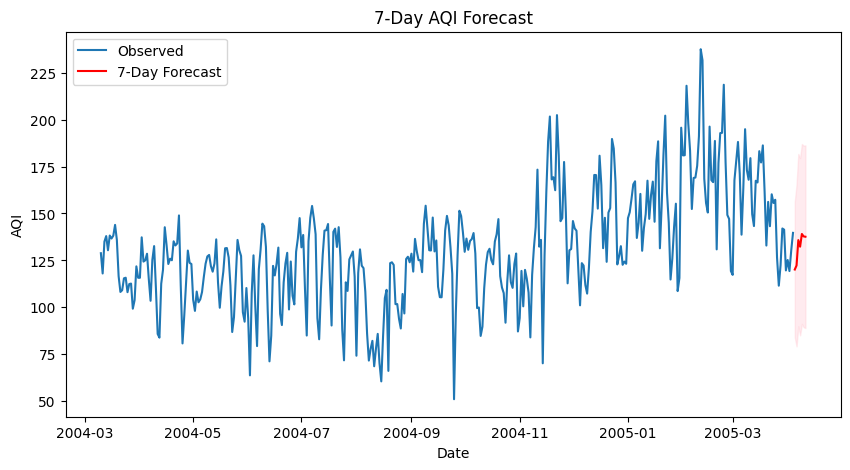

Predicted AQI for the next 7 days:
2005-04-05    120.145288
2005-04-06    122.302443
2005-04-07    135.809216
2005-04-08    132.298891
2005-04-09    139.080818
2005-04-10    137.765954
2005-04-11    137.609352
Freq: D, Name: predicted_mean, dtype: float64


In [44]:
# Forecast for the next 7 days
future_steps = 7
future_forecast = results.get_forecast(steps=future_steps)

# Get the predicted AQI values and confidence intervals
future_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

# Generate a date range starting from the day after the last date in training+test data
last_date = daily_aqi.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Align predictions with future dates
future_mean.index = future_dates
future_conf_int.index = future_dates

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_aqi.index, daily_aqi['AQI_Overall'], label='Observed')
plt.plot(future_mean.index, future_mean, label='7-Day Forecast', color='red')
plt.fill_between(future_mean.index,
                 future_conf_int.iloc[:, 0],
                 future_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('7-Day AQI Forecast')
plt.legend()
plt.show()

# Print predicted values
print("Predicted AQI for the next 7 days:")
print(future_mean)

In [45]:
print(type(daily_aqi.index))
print(daily_aqi.index)


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2004-03-10', '2004-03-11', '2004-03-12', '2004-03-13',
               '2004-03-14', '2004-03-15', '2004-03-16', '2004-03-17',
               '2004-03-18', '2004-03-19',
               ...
               '2005-03-26', '2005-03-27', '2005-03-28', '2005-03-29',
               '2005-03-30', '2005-03-31', '2005-04-01', '2005-04-02',
               '2005-04-03', '2005-04-04'],
              dtype='datetime64[ns]', name='DateTime', length=391, freq='D')


<ipython-input-46-9c813e148c68>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_train = X_train.fillna(method='ffill').fillna(method='bfill')  # Fill NaNs using forward and backward fill
<ipython-input-46-9c813e148c68>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill').fillna(method='bfill')  # Fill NaNs using forward and backward fill
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


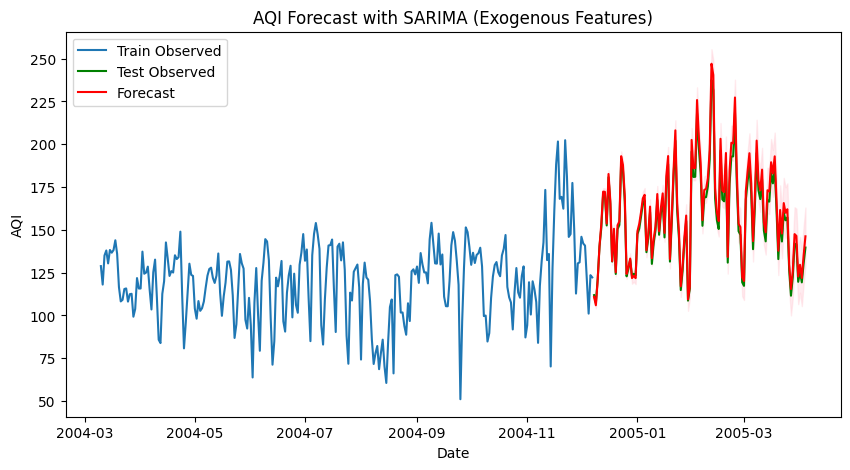

RMSE: 4.518784101668275


In [46]:
# Ensure exogenous features are selected
exogenous_features = ['CO(GT)','C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','NO2(GT)','PT08.S5(O3)','T','RH','AH']  # Modify this list based on available columns
train_size = int(len(daily_aqi) * 0.7)
train, test = daily_aqi[:train_size], daily_aqi[train_size:]

# Ensure the indices are correctly set to DatetimeIndex
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# Prepare the exogenous variables for training and testing sets
X_train = train[exogenous_features]
X_test = test[exogenous_features]

# Handle missing values (NaNs) and infinite values (infs) in exogenous variables
X_train = X_train.fillna(method='ffill').fillna(method='bfill')  # Fill NaNs using forward and backward fill
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())  # Replace infs with NaNs and then fill with mean

X_test = X_test.fillna(method='ffill').fillna(method='bfill')  # Fill NaNs using forward and backward fill
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.mean())  # Replace infs with NaNs and then fill with mean

# Fit the SARIMA model on the training set (with exogenous features)
model = SARIMAX(train['AQI_Overall'],
                       exog=X_train,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
results = model.fit()

# Forecasting the next steps (same length as the test set), with exogenous variables
forecast = results.get_forecast(steps=len(test), exog=X_test)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# --------------------- Handle NaNs in test['AQI_Overall'] ---------------------
# Drop rows with NaN values from both test and predicted_mean
test_no_nan = test['AQI_Overall'].dropna()
predicted_mean_no_nan = predicted_mean[test_no_nan.index]  # Align using the index of test_no_nan
# ------------------------------------------------------------------------------

# Plot the observed vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['AQI_Overall'], label='Train Observed')
plt.plot(test.index, test['AQI_Overall'], label='Test Observed', color='green')
plt.plot(predicted_mean.index, predicted_mean, label='Forecast', color='red')

# Adding confidence intervals
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Forecast with SARIMA (Exogenous Features)')
plt.legend()
plt.show()

# Calculate RMSE or any other metric for validation
from sklearn.metrics import mean_squared_error

# Use the NaN-dropped Series for RMSE calculation
rmse = mean_squared_error(test_no_nan, predicted_mean_no_nan) # Use NaN-dropped Series
rmse = np.sqrt(rmse)
print(f"RMSE: {rmse}")

In [47]:
import joblib

# Save the model to a file
joblib.dump(results, 'sarima_model_day_ahead.pkl')  # or use .joblib extension

['sarima_model_day_ahead.pkl']

<ipython-input-48-828a7d6e3878>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog = exog.fillna(method='ffill').fillna(method='bfill')
<ipython-input-48-828a7d6e3878>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog = exog.fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: M

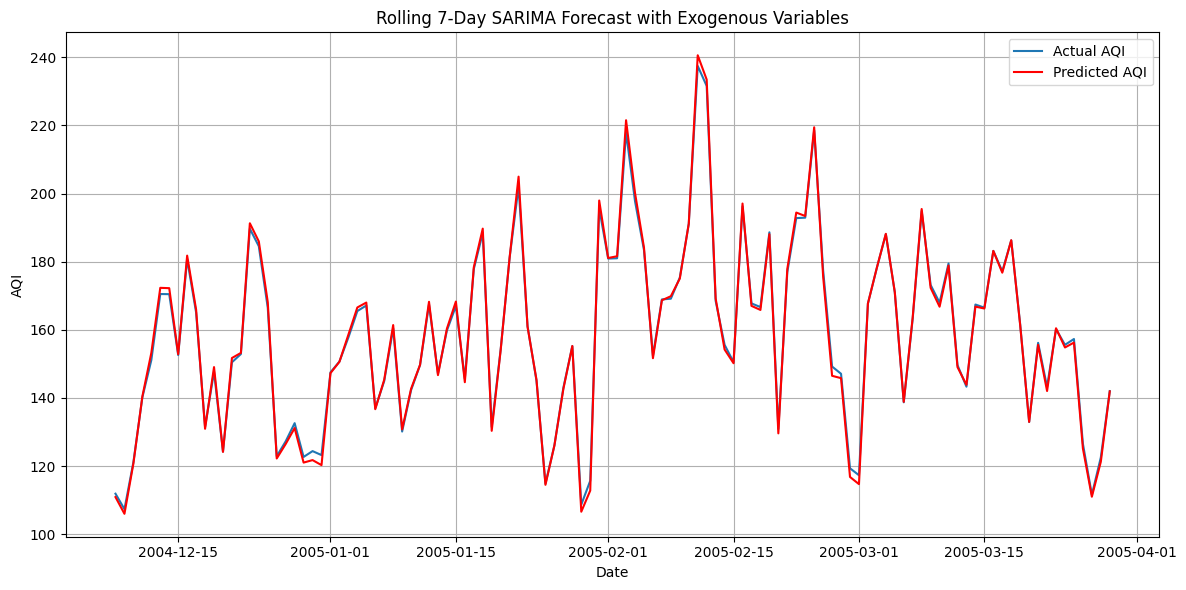

Rolling 7-Day Validation RMSE: 1.23


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Parameters
exogenous_features = ['CO(GT)','C6H6(GT)','PT08.S2(NMHC)',
                      'PT08.S3(NOx)','NO2(GT)','PT08.S5(O3)','T','RH','AH']
rolling_window = 7  # Predict 7 days ahead
train_size = int(len(daily_aqi) * 0.7)

# Split into train/test
train, test = daily_aqi[:train_size], daily_aqi[train_size:]
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# Preprocess exogenous variables
def preprocess_exog(df):
    exog = df[exogenous_features].copy()
    exog = exog.fillna(method='ffill').fillna(method='bfill')
    exog = exog.replace([np.inf, -np.inf], np.nan).fillna(exog.mean())
    return exog

X_train = preprocess_exog(train)
X_test = preprocess_exog(test)

# Rolling 7-day validation
rolling_predictions = []
actuals = []
conf_ints = []
dates = []

start_idx = 0
while start_idx + rolling_window <= len(test):
    # Historical data up to this point
    train_y = pd.concat([train['AQI_Overall'], test['AQI_Overall'][:start_idx]])
    train_x = pd.concat([X_train, X_test.iloc[:start_idx]])

    # Exog for prediction window
    test_window_exog = X_test.iloc[start_idx:start_idx + rolling_window]
    true_vals = test['AQI_Overall'].iloc[start_idx:start_idx + rolling_window]
    date_range = test.index[start_idx:start_idx + rolling_window]

    try:
        model = SARIMAX(train_y,
                        exog=train_x,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 7),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)

        forecast = results.get_forecast(steps=rolling_window, exog=test_window_exog)
        predicted_mean = forecast.predicted_mean
        conf_int = forecast.conf_int()

        rolling_predictions.extend(predicted_mean)
        actuals.extend(true_vals)
        conf_ints.append(conf_int)
        dates.extend(date_range)
    except Exception as e:
        print(f"Skipped window starting at {start_idx} due to error: {e}")

    start_idx += rolling_window

# Convert results to pandas Series
pred_series = pd.Series(rolling_predictions, index=dates)
true_series = pd.Series(actuals, index=dates)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(true_series, label='Actual AQI')
plt.plot(pred_series, label='Predicted AQI', color='red')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Rolling 7-Day SARIMA Forecast with Exogenous Variables')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(true_series, pred_series))
print(f"Rolling 7-Day Validation RMSE: {rmse:.2f}")

In [49]:
import joblib

# Save the model to a file
joblib.dump(results, 'sarima_model_week_ahead.pkl')  # or use .joblib extension

['sarima_model_week_ahead.pkl']

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [51]:
series = df['AQI_Overall']
series = series.resample('H').mean().interpolate()

# Normalize
scaler = MinMaxScaler()
scaled = scaler.fit_transform(series.values.reshape(-1, 1))

<ipython-input-51-fbbf7f467b2e>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series = series.resample('H').mean().interpolate()


In [52]:
def create_sequences(data, lookback=24):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 24  # past 24 hours to predict next
X, y = create_sequences(scaled, lookback)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM expects 3D


In [53]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [54]:
model = Sequential()

# First LSTM layer (return_sequences=True for stacking)
model.add(LSTM(128, return_sequences=True, input_shape=(lookback, 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer for transformation before output
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Stop training when validation loss doesn't improve for 10 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Save best model (optional if saving to disk)
checkpoint = ModelCheckpoint('best_lstm_model_day.h5', monitor='val_loss', save_best_only=True)

# Reduce learning rate when val_loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

callbacks = [early_stop, checkpoint, reduce_lr]

In [56]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks,
                    verbose=1)

Epoch 1/50
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0204

210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0204 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 2/50
204/210 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079

210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0079 - val_loss: 0.0043 - learning_rate: 0.0010
Epoch 3/50
205/210 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061

210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0060 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054

210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0054 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 5/50
204/210 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049

210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0049 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 6/50
203/210 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047

210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0047 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 7/50
207/210 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044

210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0044 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 8/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045

210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0045 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 9/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042

210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0042 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 10/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 11/50
205/210 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042

210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0042 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 12/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0042 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 13/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0042 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 14/50
209/210 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042

210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0042 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 15/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0038 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 16/50
204/210 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 17/50
203/210 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036

210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0036 - val_loss: 0.0022 - learning_rate: 5.0000e-04
Epoch 18/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0036 - val_loss: 0.0032 - learning_rate: 5.0000e-04
Epoch 19/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0037 - val_loss: 0.0025 - learning_rate: 5.0000e-04
Epoch 20/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0036 - val_loss: 0.0025 - learning_rate: 5.0000e-04
Epoch 21/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0036 - val_loss: 0.0022 - learning_rate: 5.0000e-04
Epoch 22/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036
Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0036 - val_loss: 0.0026 - learning_rate: 5.0000e-04
Epoch 23/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0035 - val_loss: 0.0024 - learning_rate: 2.5000e-04
Epoch 24/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0034 - val_

In [57]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"RMSE: {rmse:.2f}")

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE: 24.31


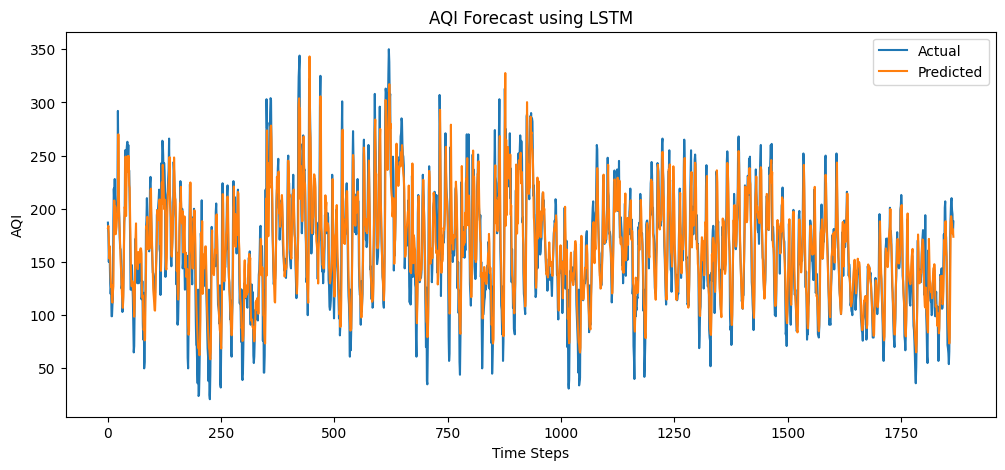

In [58]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("AQI Forecast using LSTM")
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprym4812_/7exufb25.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprym4812_/h3_bph2p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55490', 'data', 'file=/tmp/tmprym4812_/7exufb25.json', 'init=/tmp/tmprym4812_/h3_bph2p.json', 'output', 'file=/tmp/tmprym4812_/prophet_model1dhsspfp/prophet_model-20250505092855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-59-c0b9e52e8657>:47: Futu

RMSE (daily forecast): 1.91


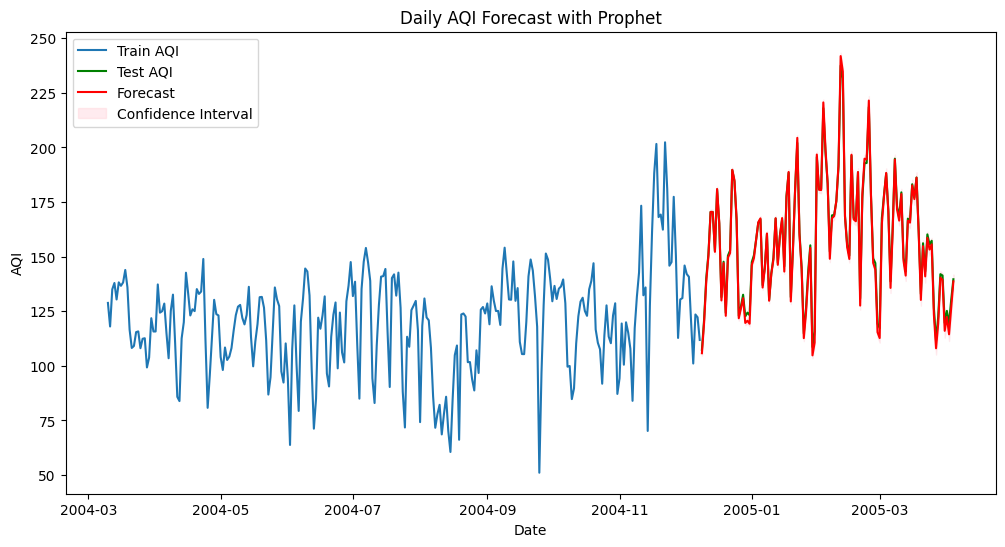

In [59]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Step 1: Resample hourly data to daily means
df = df.reset_index()
df['DateTime'] = pd.to_datetime(df['DateTime'])  # ensure datetime format
df.set_index('DateTime', inplace=True)
daily_df = df.resample('D').mean().reset_index()

# Calculate the number of rows for 30% test set
test_ratio = 0.3
test_size = int(len(daily_df) * test_ratio)

# Split the data
train = daily_df.iloc[:-test_size]
test = daily_df.iloc[-test_size:]

# Step 3: Rename columns for Prophet
train_prophet = train[['DateTime', 'AQI_Overall', 'T', 'RH', 'AH','CO(GT)', 'C6H6(GT)',
                       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)']].copy()
train_prophet.columns = ['ds', 'y', 'T', 'RH', 'AH','CO(GT)', 'C6H6(GT)',
                         'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)']

test_prophet = test[['DateTime', 'AQI_Overall', 'T', 'RH', 'AH','CO(GT)', 'C6H6(GT)',
                     'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)']].copy()
test_prophet.columns = ['ds', 'y', 'T', 'RH', 'AH','CO(GT)', 'C6H6(GT)',
                        'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)']

# Step 4: Initialize Prophet and add regressors
model = Prophet()
regressors = ['T', 'RH', 'AH','CO(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
              'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)']
for reg in regressors:
    model.add_regressor(reg)

# Step 5: Fit the model
model.fit(train_prophet)

# Step 6: Create future dataframe
future = test_prophet[['ds'] + regressors].copy()
#future = pd.concat([train_prophet[['ds'] + regressors], future], ignore_index=True) # Removing the concat

# Fill NaNs in regressors (just in case)
for reg in regressors:
    future[reg] = future[reg].fillna(method='ffill').fillna(method='bfill')

# Step 7: Forecast
forecast = model.predict(future)

# Extract predicted values for test period
# forecast_test = forecast.iloc[-30:]  #No longer need to slice

# Step 8: Evaluate
# Use the entire 'forecast' DataFrame for evaluation to match the test data
rmse = np.sqrt(mean_squared_error(test_prophet['y'], forecast['yhat']))
print(f'RMSE (daily forecast): {rmse:.2f}')

# Step 9: Plot
plt.figure(figsize=(12, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train AQI')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test AQI', color='green')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red') # Use 'forecast' instead of 'forecast_test'
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 alpha=0.3, color='pink', label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Daily AQI Forecast with Prophet')
plt.legend()
plt.show()

In [60]:
import joblib

# After fitting your model
joblib.dump(model, 'prophet_model_day_ahead.pkl')

['prophet_model_day_ahead.pkl']

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprym4812_/oqemkt9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprym4812_/ifzg99up.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76685', 'data', 'file=/tmp/tmprym4812_/oqemkt9p.json', 'init=/tmp/tmprym4812_/ifzg99up.json', 'output', 'file=/tmp/tmprym4812_/prophet_model_g77750n/prophet_model-20250505092856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-61-838c7e5828d1>:45: Futu

Rolling 7-Day Prophet Forecast RMSE: 1.20


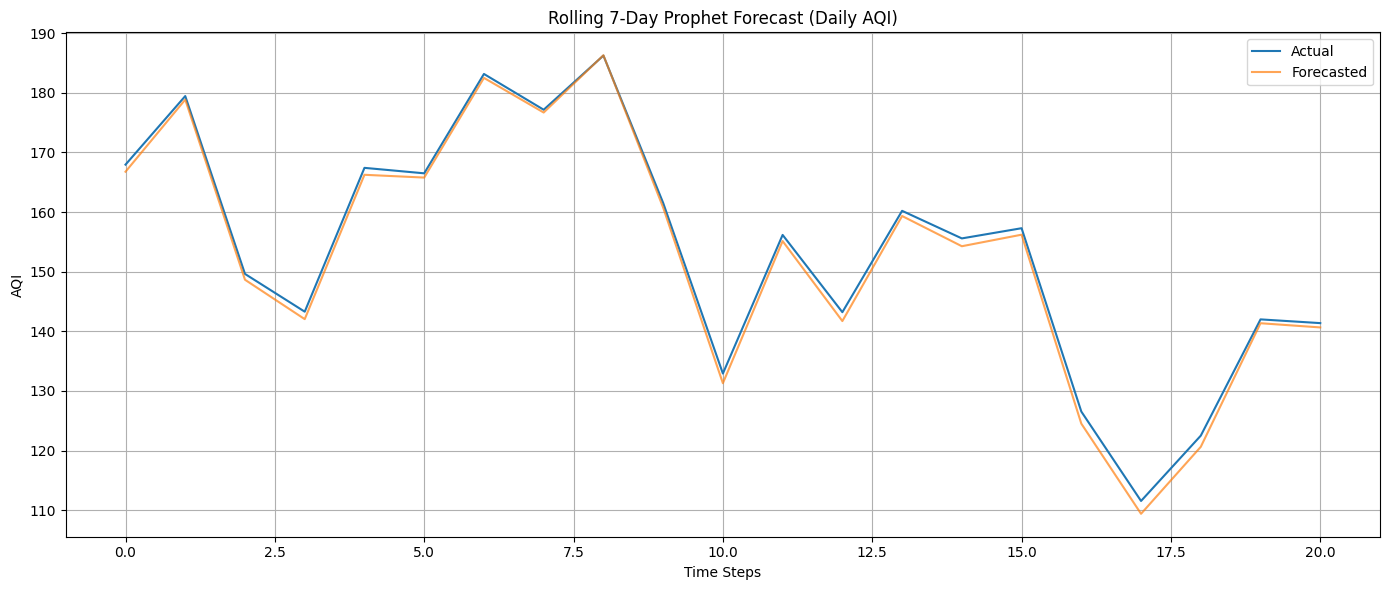

In [61]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm

# Ensure datetime and daily resampling
df = df.reset_index()
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
daily_df = df.resample('D').mean().reset_index()

# Prepare final Prophet-compatible dataframe
prophet_df = daily_df[['DateTime', 'AQI_Overall', 'T', 'RH', 'AH','CO(GT)', 'C6H6(GT)',
                       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)']].copy()
prophet_df.columns = ['ds', 'y', 'T', 'RH', 'AH','CO(GT)', 'C6H6(GT)',
                      'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)']

# Rolling forecast parameters
forecast_horizon = 7  # days
step = 7  # move window every 7 days
start_idx = 365  # start after 1 year of training
rmse_list = []
y_true_all = []
y_pred_all = []

# Rolling loop
while (start_idx + forecast_horizon) <= len(prophet_df):
    train_df = prophet_df.iloc[:start_idx]
    test_df = prophet_df.iloc[start_idx : start_idx + forecast_horizon]

    # Initialize and add regressors
    model = Prophet()
    regressors = ['T', 'RH', 'AH','CO(GT)', 'C6H6(GT)',
                  'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)']
    for reg in regressors:
        model.add_regressor(reg)

    model.fit(train_df)

    # Future dataframe
    future = test_df[['ds'] + regressors].copy()
    for reg in regressors:
        future[reg] = future[reg].fillna(method='ffill').fillna(method='bfill')

    # Forecast
    forecast = model.predict(future)

    # Evaluation
    y_true = test_df['y'].values
    y_pred = forecast['yhat'].values
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    rmse_list.append(rmse)

    start_idx += step

# Final RMSE
overall_rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))
print(f"Rolling 7-Day Prophet Forecast RMSE: {overall_rmse:.2f}")

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(y_true_all, label='Actual')
plt.plot(y_pred_all, label='Forecasted', alpha=0.7)
plt.title("Rolling 7-Day Prophet Forecast (Daily AQI)")
plt.xlabel("Time Steps")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
import joblib

# After fitting your model
joblib.dump(model, 'prophet_model_week_ahead.pkl')

['prophet_model_week_ahead.pkl']